In [2]:
from pyforest import*
lazy_imports()

['import imutils',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'from xlrd import open_workbook',
 'import plotly.express as px',
 'from sklearn import metrics',
 'import fbprophet',
 'import cv2',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import glob',
 'from fbprophet import Prophet',
 'import tensorflow as tf',
 'from sklearn.preprocessing import RobustScaler',
 'import statistics',
 'import sklearn',
 'import numpy as np',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import torch',
 'from sklearn.preprocessing import OneHotEncoder',
 'from sklearn.model_selection import train_test_split',
 'import datetime as dt',
 'import matplotlib.pyplot as plt',
 'import textblob',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.linear_model import RidgeCV',
 'from 

In [5]:
df =pd.read_csv('diabetes.csv')
df.head()

<IPython.core.display.Javascript object>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
df.shape

(768, 9)

In [14]:
df.isnull().values.sum()

0

In [17]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<IPython.core.display.Javascript object>

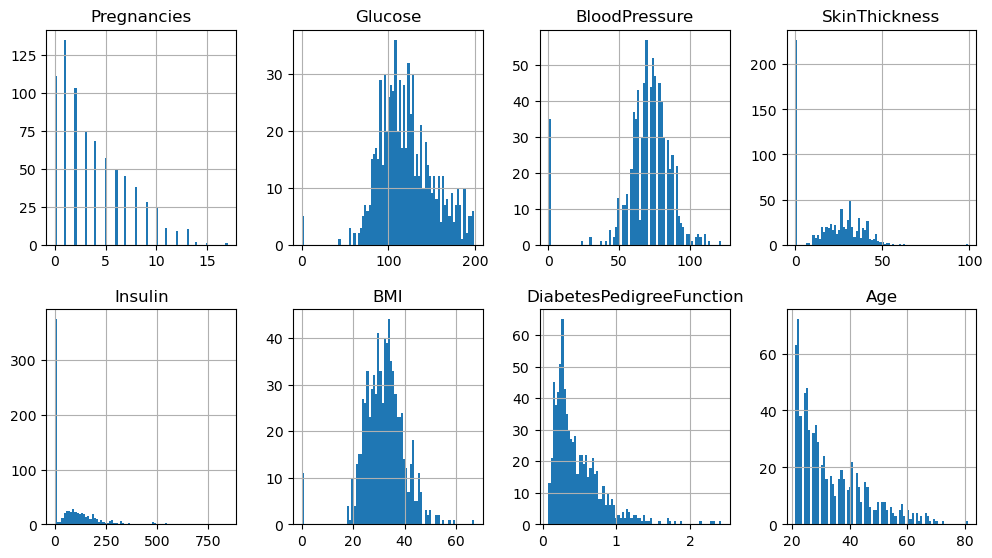

In [27]:
columns =list(df)[0:-1]
df[columns].hist(bins=80, figsize=(12,50), layout=(14,4))
plt.show()

In [30]:
#correlation matrix
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

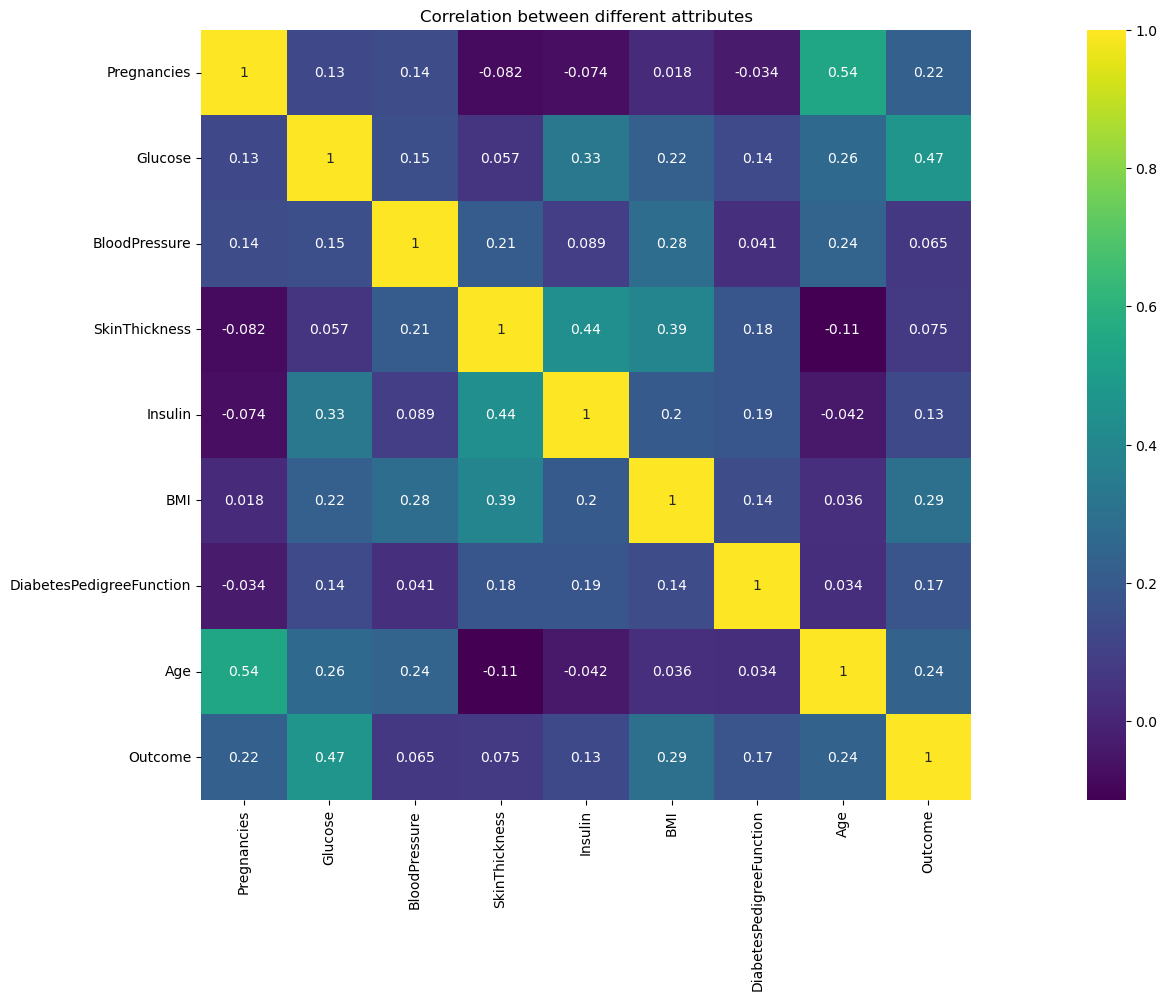

In [35]:
#correlation heatmap
plt.figure(figsize =(30,10))
sns.heatmap(df.corr(), vmax =1, annot =True, square =True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

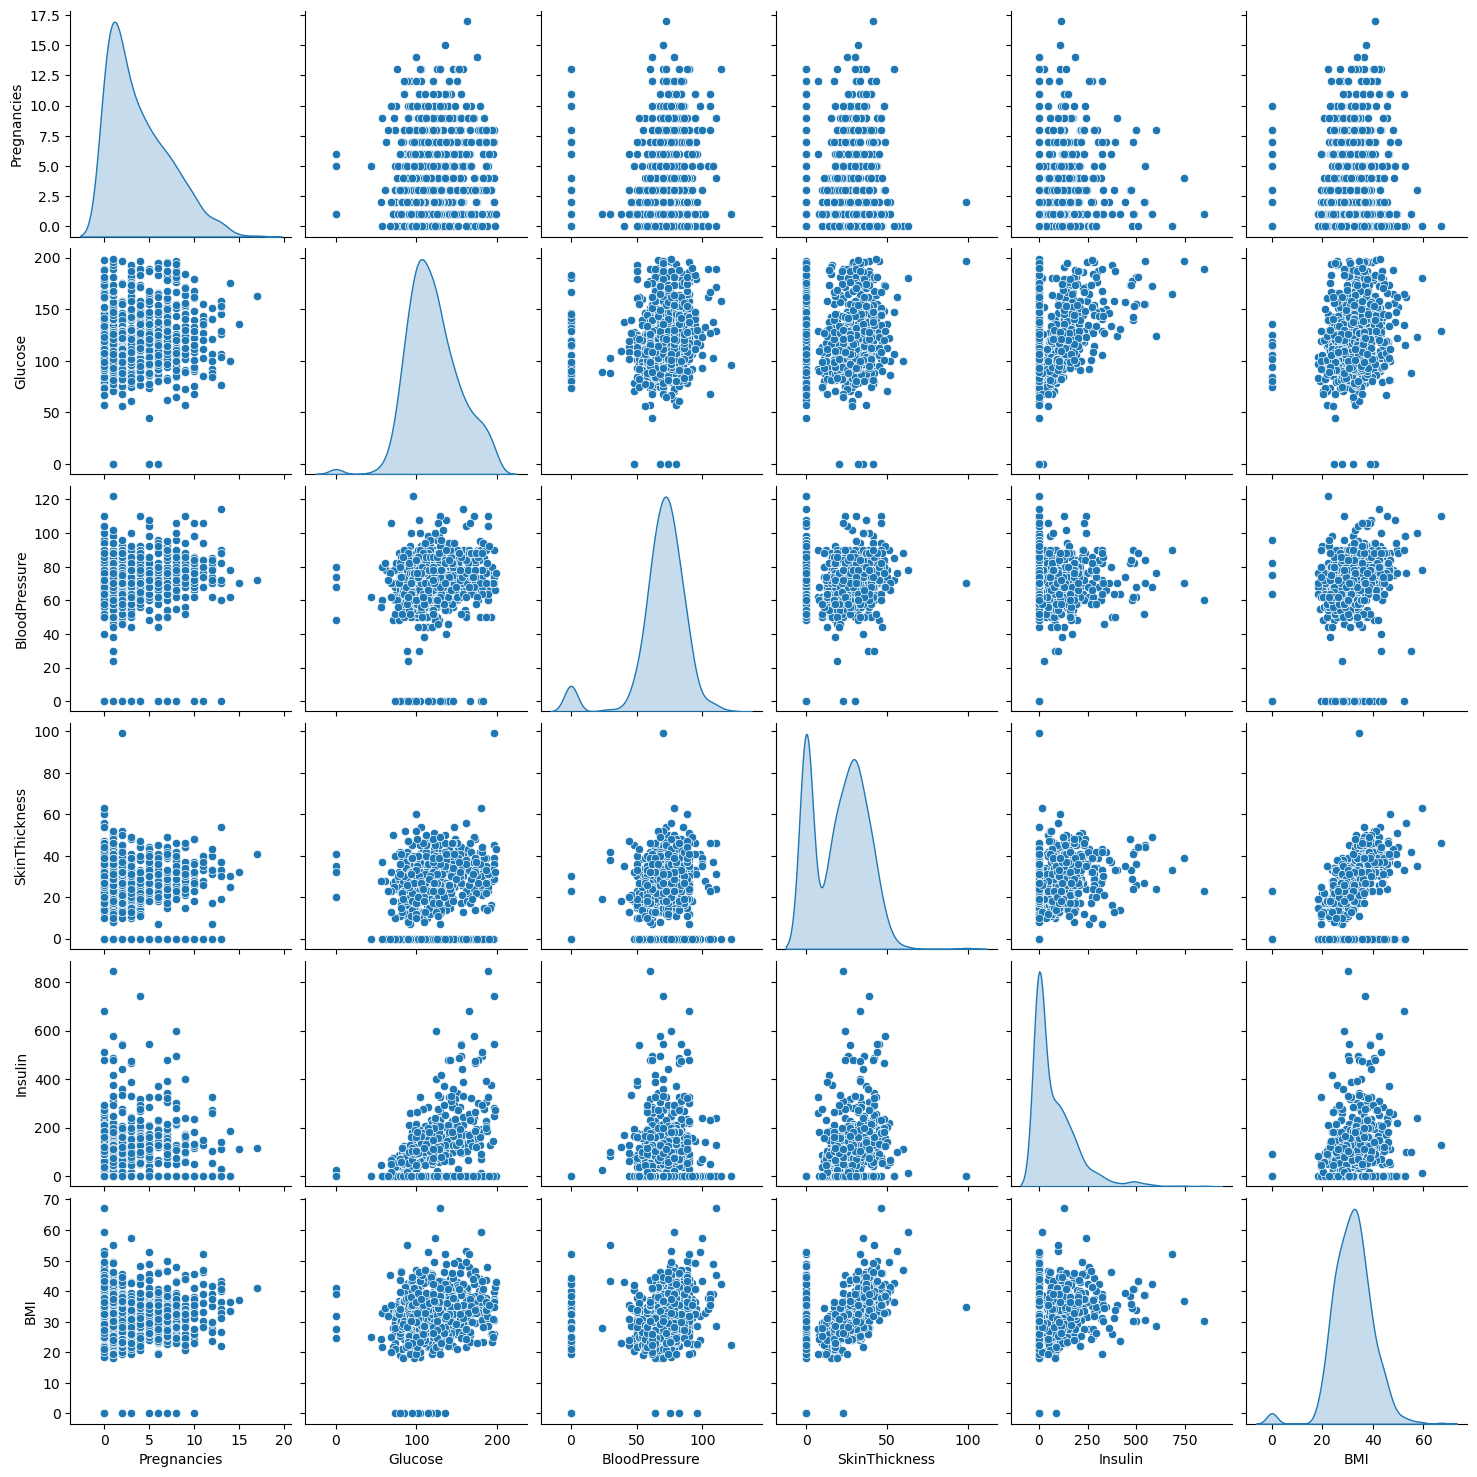

In [42]:
allocate_select =df.iloc[:, 0:6]
sns.pairplot(allocate_select, diag_kind='kde')

In [53]:
df['Outcome'].value_counts()


0    500
1    268
Name: Outcome, dtype: int64

In [54]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [1]:
# splitting data
from sklearn.model_selection import train_test_split
x =df.drop('Outcome', axis =1)
y =df['Outcome']
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.3, random_state =1)

NameError: name 'df' is not defined

In [59]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29
...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30
715,7,187,50,33,392,33.9,0.826,34
72,13,126,90,0,0,43.4,0.583,42
235,4,171,72,0,0,43.6,0.479,26


In [61]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 537, dtype: int64

In [68]:
# data preparation
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [96]:
from sklearn.impute import SimpleImputer
replace_ =SimpleImputer(missing_values=0, strategy ="mean")
cols =x_train.columns

x_train =pd.DataFrame(replace_.fit_transform(x_train))
x_test =pd.DataFrame(replace_.fit_transform(x_test))

x_train.columns =cols
x_test.columns=cols


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [116]:
# Building a model
from sklearn import metrics
# from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
#learn from the model
model =LogisticRegression(solver ="liblinear")
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [117]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [118]:
#predict
y_model =model.predict(x_test)


In [122]:
#determine the score
model_score = model.score(x_test, y_test)
model_score

0.7792207792207793

# PART TWO REVISION
## MEDICAL INSURANCE PREMIUM PREDICTION

This project accurately predicts insurance costs as charges is the dependent variable

In [1]:
from pyforest import*
lazy_imports()

['from sklearn.model_selection import KFold',
 'import os',
 'import altair as alt',
 'import sklearn',
 'import plotly.express as px',
 'from sklearn.model_selection import train_test_split',
 'from sklearn.linear_model import Ridge',
 'import pandas as pd',
 'from pathlib import Path',
 'from fbprophet import Prophet',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.preprocessing import LabelEncoder',
 'from sklearn.linear_model import ElasticNet',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.model_selection import GridSearchCV',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import nltk',
 'from openpyxl import load_workbook',
 'import dash',
 'from scipy import stats',
 'import imutils',
 'import datetime as dt',
 'import pydot',
 'import numpy as np',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import lightgbm as lgb',
 'from sklearn.linear_model impor

In [2]:
dataset =pd.read_csv('insurance_medical.csv')

<IPython.core.display.Javascript object>

## Data exploration

In [7]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.shape

(1338, 7)

In [9]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [11]:
dataset.select_dtypes(include='int64').columns

Index(['age', 'children'], dtype='object')

In [12]:
dataset.select_dtypes(include='float64').columns

Index(['bmi', 'charges'], dtype='object')

In [13]:
dataset.isnull().values.any()

False

In [15]:
dataset.isnull().values.sum()

0

## statistical summary

In [18]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Group the dataset by 'sex', 'smoker, 'region'

In [19]:
dataset.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [20]:
dataset.groupby('smoker').mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [22]:
dataset.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


## Encoding categoric data

In [23]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [24]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [25]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [26]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [27]:
dataset['region'].nunique()

4

In [28]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## one hot encoding

In [29]:
dataset =pd.get_dummies(data =dataset, drop_first=True)

<IPython.core.display.Javascript object>

In [30]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [31]:
dataset.shape

(1338, 9)

## Correlation Matrix

In [33]:
dataset_2 =dataset.drop(columns ='charges')

<AxesSubplot:title={'center':'correlation with charges'}>

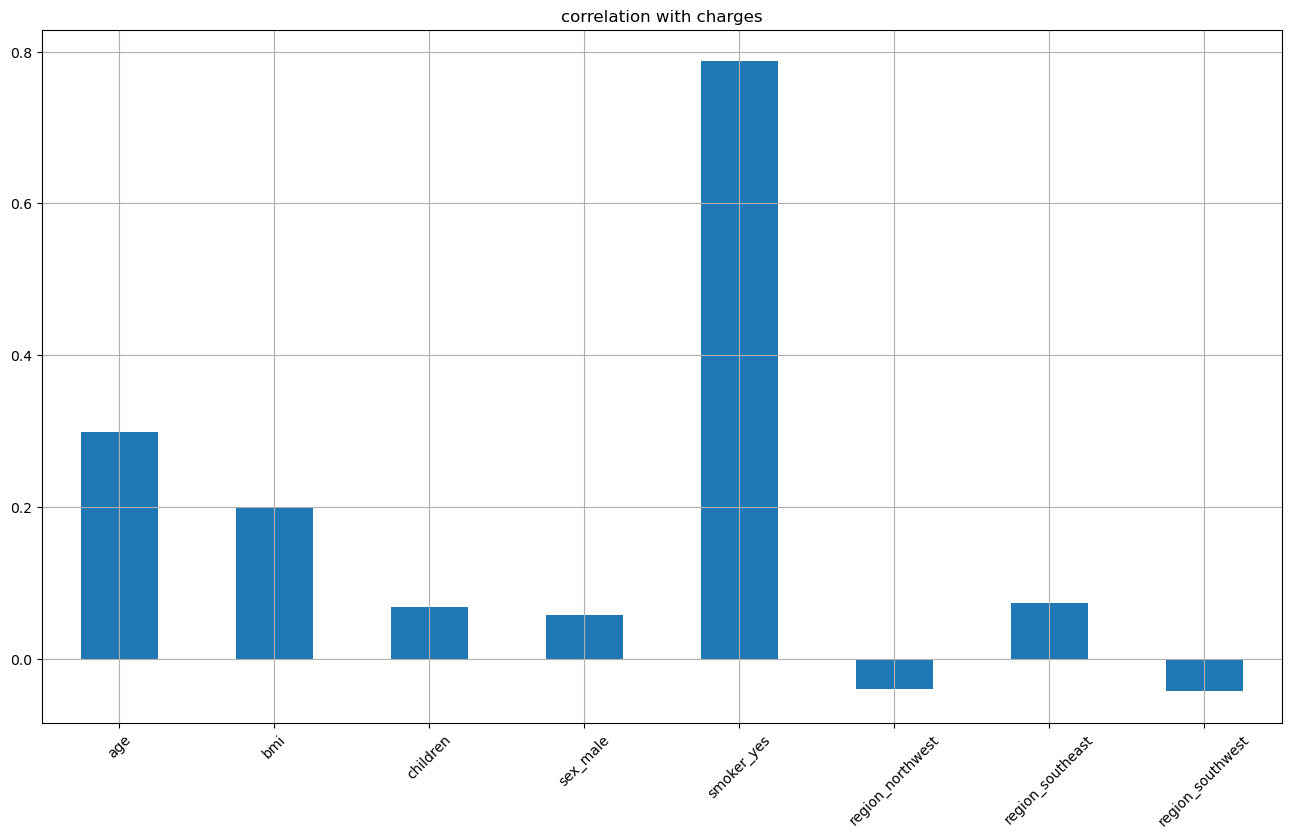

In [35]:
dataset_2.corrwith(dataset['charges']).plot.bar(figsize=(16,9), title ='correlation with charges', rot=45, grid=True)

In [36]:
corr =dataset.corr()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

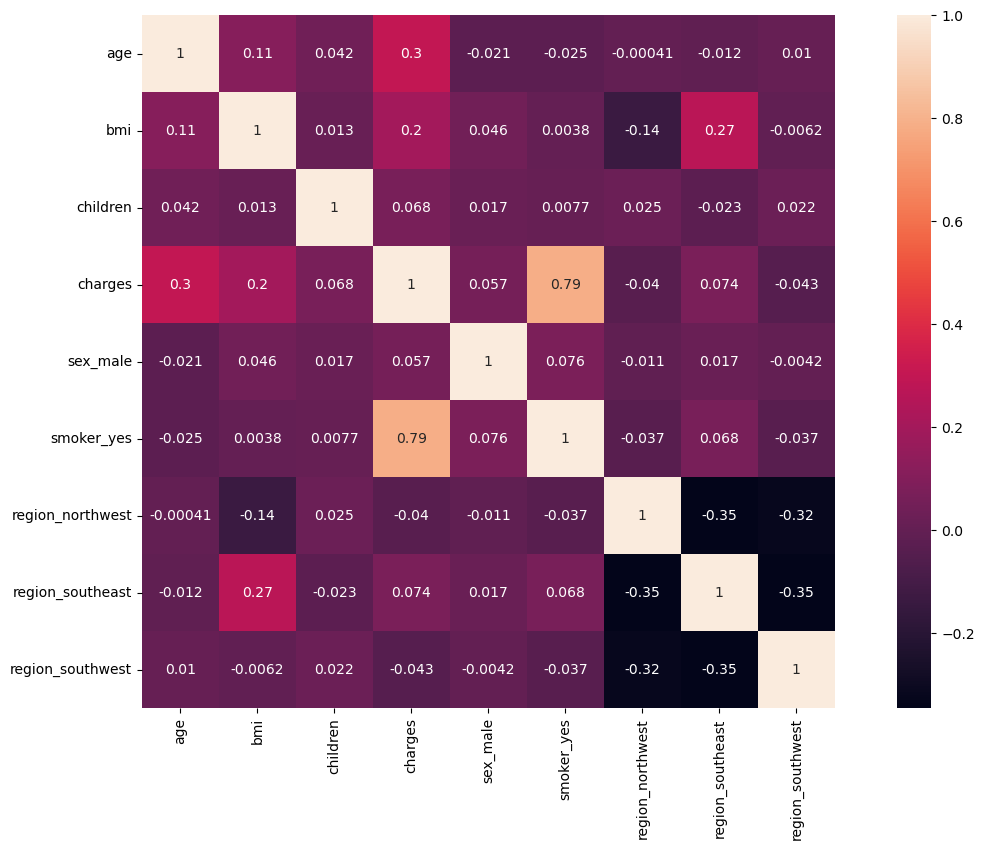

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True, vmax=1, square=True)

# splitting the dataset

In [38]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [39]:
x =dataset.drop(columns='charges')

In [40]:
y =dataset['charges']

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)

In [43]:
x_train.shape

(1070, 8)

In [44]:
x_test.shape

(268, 8)

## Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [46]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [47]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]])

# Buillding the model

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
reg_lr =LinearRegression()
reg_lr.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred =reg_lr.predict(x_test)

In [51]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7999876970680433

## Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
reg_rf =RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
y_pred =reg_rf.predict(x_test)


In [56]:
r2_score(y_test, y_pred)

0.8779746196374739

## XGBoost Regression

In [57]:
from xgboost import XGBRFRegressor
reg_xgb =XGBRFRegressor()
reg_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [58]:
y_pred =reg_xgb.predict(x_test)

In [59]:
r2_score(y_test, y_pred)

0.894639423491463

#Here we see the XGBoost regression performs better than other models. Thus it is the best to use while making predictions of the medical insurance premium